#Mounting drive,  Installing libraries and importing them

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!pip install pyannote.audio==1.1.1
!pip install webrtcvad

     |████████████████████████████████| 235kB 5.2MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 296kB 8.5MB/s 
     |████████████████████████████████| 133kB 10.4MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 1.2MB 9.5MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 112kB 22.7MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 143kB 19.3MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
  Created wheel for pescador: filename=pescador-2.1.0-cp37-none-any.whl size=21077 sha256=a00c4a58af53f7a201c39bb99dea75fcc54bc04c2b99f33aaeed62c3a94f97be
  Stored in directory: /root/.cache/pip/wheels/e7/e7/2d/de501314d1f03d8607aed0f6b48e50d8699f681745003aaa5b
  Created wheel for alembic

In [ ]:
import contextlib   
import wave
import librosa
import webrtcvad

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.layers.core import Dense
from keras.models import Sequential
from keras.layers import Bidirectional, TimeDistributed, Dropout
from keras.layers import LSTM

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from pyannote.core import Annotation, Segment

from sklearn import preprocessing
import pandas as pd

#Location of Best Model & Demo Video clip

In [ ]:
h5_model_file = '/content/drive/My Drive/Hindi/models/model_hindi_large.h5' #the path where best model is stored
audiofile = '/content/drive/My Drive/Hindi/indra.wav'  #the path where demo clip is stored

import sys
sys.path.append('/content/drive/MyDrive/Hindi/scripts') #the path where python scripts are stored

#Loading the best trained Model

In [ ]:
%tensorflow_version 1.x

model = Sequential()

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(TimeDistributed(Dense(32)))
model.add(TimeDistributed(Dense(32)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))

model.build(input_shape=(None, 137, 35))
model.summary()


model.load_weights(h5_model_file)

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 137, 256)          167936    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 137, 256)          394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 137, 32)           8224      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 137, 32)           1056      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 137, 1)            33        
Total params: 571,489
Trainable params: 571,489
Non-trainable params: 0
_________________________________________________________________


# Importing Voice Activity Detection Module

In [ ]:
#Importing functions from script containing Voice Activity Detection
import vad
from vad import *

voice = fxn(audiofile)

sample rate 48000


# Importing Segementation Module 

### Then segmenting the audio files on basis of speakers


(35, 54283)
(1593, 137, 35)
(1593, 137, 1)


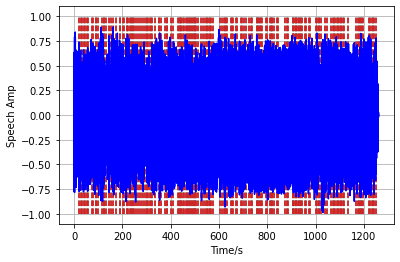

In [ ]:
import segmentation
from segmentation import *

segmented = multi_segmentation(audiofile,model)

gp = group_intervals(voice)
splt = spliting(segmented,gp)
resegmented = final_reseg(splt)


# Importing Embeddings Generation Module 

### Then generating the embedding of the segmented file obtained from above 


In [ ]:
import Embedding
from Embedding import *

embeddings = embeddings_(audiofile,resegmented,2)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /root/.cache/torch/hub/master.zip


/usr/local/lib/python3.7/dist-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning:

The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release



# Importing Clusteing Generation Module 

### Then generating clusters and assigning them with resoective Speaker_id


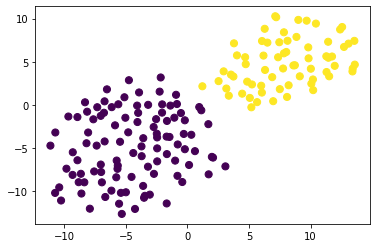

In [ ]:
import cluster
from cluster import *

speak_id , n_speakers = clustering(embeddings)
label_list = []
alpha = 'A'
for i in range(0, n_speakers): 
    label_list.append(alpha) 
    alpha = chr(ord(alpha) + 1) 
lb = preprocessing.LabelEncoder()
label_hyp = lb.fit(label_list)
speaker_id = lb.inverse_transform(speak_id)
hyp_df = pd.DataFrame({'Speaker_id': speaker_id,'Offset': resegmented[:, 0], 'end': resegmented[:, 1]})
result_hypo = hypothesis_gen(hyp_df)  


### Converting time from seconds to minutes & seconds.

### Also replacing the Speaker 'A' with 'Indra G' & Speaker 'B' with 'Reporter'

In [ ]:
df = hyp_df.copy()
for i in range(len(df["Offset"])):
    a=df["Offset"][i]
    df["Offset"][i]=int(a/60)*1.0+(a%60)*0.01
    a=df["end"][i]
    df["end"][i]=int(a/60)*1.0+(a%60)*0.01
    a = df["Speaker_id"][i]
    if a=='A':
        df["Speaker_id"][i] = 'Indra G'
    else:
        df["Speaker_id"][i] = 'Reporter'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying 

In [ ]:
# Displaying random chunck of prediction generated
df[20:80]

,Speaker_id,Offset,end
20,Indra G,2.354282,2.508130
21,Indra G,2.508230,3.060221
22,Reporter,3.060321,3.074617
23,Reporter,3.074717,3.172141
24,Reporter,3.172241,3.246677
25,Reporter,3.246777,3.332359
26,Indra G,3.332459,3.360223
27,Indra G,3.360323,3.400161
28,Indra G,3.400261,3.461462
29,Indra G,3.461562,3.525549
